Author: Amparo Godoy Pastore <br>
Date: June 2nd, 2024 <br>
Course: CAP 6619 - Deep Learning - Florida Atlantic University <br>

# Dog vs Cat Image Classification Using Dense Layers

In [5]:
# load dogs vs cats dataset, reshape and save to a new file
import numpy as np
from os import listdir
from numpy import asarray
from numpy import save
# tensorflow
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Activation, Flatten, Dense, Dropout, Conv2D
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot as plt
from matplotlib.image import imread
# cross validation framework
from sklearn.model_selection import KFold

In [56]:
# define location of dataset
folder = 'dogvscat1000/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
    # determine class
    output = 0.0
    if file.startswith('cat'):
        output = 1.0
        # load image
    photo = load_img(folder + file, target_size=(32, 32),color_mode="rgb")  #"rgb" for color mode; "grayscale"
    # convert to numpy array
    photo = img_to_array(photo)
    # store
    photos.append(photo)
    labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)

(1000, 32, 32, 3) (1000,)


### Answers.

Use 10-fold cross validation to split the 1000 images into training vs. test set. Train neural networks using training set, and report their performance on the test set. 

Create a feedforward neural network with one or two hidden layers (you can determine the number of hidden nodes for each layer, but the number of hidden nodes for each layer should be at least 50). Train the network on the training set and report its performance on the test. Report at least one loss plot with respect to the number of epochs. Report 10-fold cross validation accuracy, including mean and standard deviation.

For the same network structure created above, please change the network structure by adding batch normalization and/or dropout layer (at different layers). Report 10-fold cross validation performance of the network by adding batch normalization and dropout layer, respectively (you can decide which layer(s) to add batch normalization and/or dropout). Conclude batch normalization and drop-out impact on the neural network performance.

In [57]:
# Create a feedforward neural network with one or two hidden layers (you can determine the number of hidden nodes for each layer, 
# but the number of hidden nodes for each layer should be at least 50). 
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3),name="Input"),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(2, name="Output"),
])

# For the same network structure created above, please change the network structure by adding batch normalization and/or dropout layer 
# (at different layers). 
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3),name="Input"),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, name="Output")
])

models = [model_1, model_2]

C:\Users\agodo\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
# Use 10-fold cross validation to split the 1000 images into training vs. test set. 
kf = KFold(n_splits=10, shuffle=True, random_state=123)
kf.get_n_splits(photos)

accuracies = [[] for _ in range(len(models))] 

In [59]:
# Train neural networks using training set, and report their performance on the test set.
for train_index, test_index in kf.split(photos):
    X_train, X_test = photos[train_index], photos[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    for i, model in enumerate(models):
        model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
        model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0)
        
        y_pred = model.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        
        # save accuracy for the model
        accuracies[i].append(accuracy_score(y_test, y_pred))

    test_loss, test_acc = model_1.evaluate(X_test, y_test, verbose=0)
    print('\nTest accuracy of feedforward network:', test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Test accuracy of feedforward network: 0.5099999904632568
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Test accuracy of feedforward network: 0.5099999904632568
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Test accuracy of feedforward network: 0.47999998927116394
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Test accuracy of feedforward network: 0.5799999833106995
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

Test accuracy of feedforward network: 0.46000000834465027
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Test accuracy of feedforward network: 0.4699999988079071
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Test accuracy of feedforward network: 0.46000000834465027
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━


Test accuracy of feedforward network: 0.5199999809265137


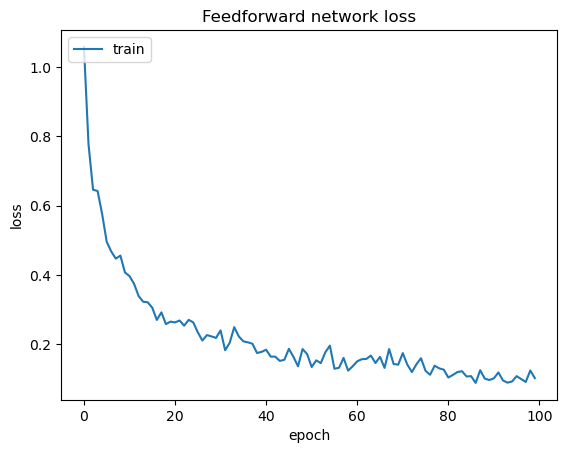

In [60]:
# Report its performance on the test.
test_loss, test_acc = model_1.evaluate(X_test, y_test, verbose=0) 
print('\nTest accuracy of feedforward network:', test_acc) # for last fold of the cross-validation

# Report at least one loss plot with respect to the number of epochs.
plt.plot(history.history['loss']) # last fold of cross validation
plt.title('Feedforward network loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [61]:
# Report 10-fold cross validation accuracy, including mean and standard deviation 
# Report 10-fold cross validation performance of the network by adding batch normalization and dropout layer, respectively (you can decide which layer(s) 
# to add batch normalization and/or dropout).
for i, model_accuracies in enumerate(accuracies):
    mean_accuracy = np.mean(model_accuracies)
    std_accuracy = np.std(model_accuracies)
    print(f"Model {i+1} - Mean Accuracy: {mean_accuracy:.4f}, Std Dev: {std_accuracy:.4f}")

Model 1 - Mean Accuracy: 0.5010, Std Dev: 0.0563
Model 2 - Mean Accuracy: 0.5030, Std Dev: 0.0593


In [62]:
# Conclude batch normalization and drop-out impact on the neural network performance. 

1. **Batch Normalization:**
   `model_2` includes batch normalization after the first dense layer. Batch normalization normalizes the activations of each layer, which helps in addressing the internal covariate shift problem and enables faster training. The mean accuracy of `model_2` is higher than that of `model_1`, indicating that batch normalization contributes positively to the model's performance. Additionally, the standard deviation of `model_2` is lower than that of `model_1`, suggesting that batch normalization helps in stabilizing the training process across different folds.

2. **Dropout:** `model_2` includes dropout with a dropout rate of 0.5 after the first dense layer. Dropout randomly sets a fraction of input units to zero during training, which helps in preventing overfitting. The mean accuracy of `model_2` is higher than that of `model_1`, indicating that dropout regularization improves the generalization ability of the model. However, the standard deviation of `model_2` is higher than that of `model_1`, suggesting that dropout introduces more variability in the performance across different folds. This could be due to the randomness introduced by dropout during training.

Overall, both batch normalization and dropout regularization techniques have a positive impact on the neural network's performance. Batch normalization helps in stabilizing and accelerating the training process, while dropout improves generalization by preventing overfitting.